In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.head()

,transaction_id,property_name,unit_type,floor_area_sqm,unit_price,sale_date,agent_name,payment_terms,location,status,commission_rate,buyer_type
0,TXN001,Lumiere Residences,Studio,24.5,2450000,2025-01-15,Maria Santos,Bank Financing,Pasig City,Completed,0.030,First-Time Buyer
1,TXN002,Prisma Residences,1BR,36.0,3600000,2025-01-18,Juan Dela Cruz,In-House Financing,Pasig City,Completed,0.025,Investor
2,TXN003,Brixton Place,2BR,56.5,5650000,2025-01-22,Anna Reyes,Spot Cash,Pasig City,Completed,0.050,Upgrader
3,TXN004,Alder Residences,Studio,22.0,2200000,2025-02-05,Maria Santos,Bank Financing,Taguig City,Completed,0.030,First-Time Buyer
4,TXN005,Fairlane Residences,3BR,85.0,8500000,2025-02-10,Carlos Garcia,In-House Financing,Pasig City,Pending,0.025,Investor


In [6]:
df = data

In [7]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [8]:
df = pd.DataFrame(data)

df.dtypes

transaction_id             object
property_name              object
unit_type                  object
floor_area_sqm            float64
unit_price                  int64
sale_date          datetime64[ns]
agent_name                 object
payment_terms              object
location                   object
status                     object
commission_rate           float64
buyer_type                 object
dtype: object

What is the total sales amount for COMPLETED transactions only?

In [9]:
total_sales_completed = df[
    df['status'] == 'Completed']['unit_price'].sum()

print(f"total amount of completed transaction: {total_sales_completed}")

total amount of completed transaction: 112680000


In [10]:
highest_sales_of_agent = df[df['status']== 'Completed']['agent_name'].value_counts().idxmax() 
agent_price_get = df[df['agent_name'] == highest_sales_of_agent]['unit_price'].sum()  
print(f"highest sales of agent: {highest_sales_of_agent} wich is {agent_price_get}")

highest sales of agent: Maria Santos wich is 37010000


In [11]:
average_unit_price = df.groupby('unit_type')['unit_price'].mean()

print(f"{average_unit_price}")

unit_type
1BR       3853125.0
2BR       5721250.0
3BR       9130000.0
Studio    2494375.0
Name: unit_price, dtype: float64


Which agent has the highest total sales value (completed transactions)?

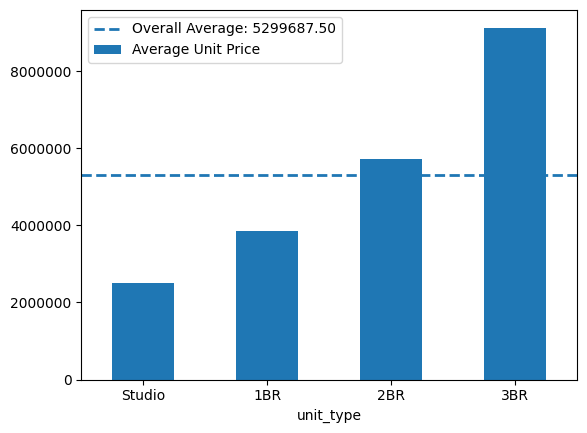

In [12]:
average_unit_price.sort_values(ascending=True).plot(kind='bar',label='Average Unit Price')

overall_avg = average_unit_price.mean()

plt.axhline(
    y=overall_avg,
    linestyle='--',
    linewidth=2,
    label=f'Overall Average: {overall_avg:.2f}'
)

plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')

plt.legend()
plt.show()

What is the average unit price per unit type (Studio, 1BR, 2BR, 3BR)?

C:\Users\francis\AppData\Local\Temp\ipykernel_9168\1762319051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_df['commision_amount'] =(


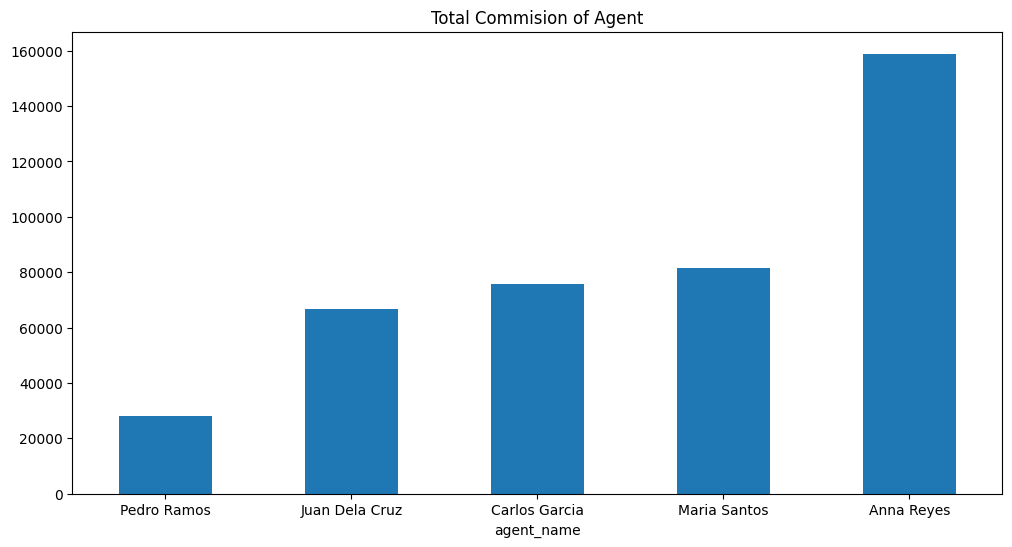

In [13]:
completed_df = df[df['status'] == 'Completed']

completed_df['commision_amount'] =(
    completed_df['unit_price'] * completed_df['commission_rate'] * 0.1
)

total_commision_of_agent = (
    completed_df.groupby('agent_name')['commision_amount'].sum()
)

sorted_data = total_commision_of_agent.sort_values(ascending=True)


sorted_data.plot(kind='bar',figsize=(12,6))
plt.title('Total Commision of Agent')
plt.xticks(rotation=0)
plt.show()






Calculate the total commission earned by each agent (use unit_price * commission_rate for completed sales only)

In [14]:
property_name_most = df[df['status'] == 'Completed']['property_name'].value_counts()
property_name_most

property_name
Lumiere Residences       4
Prisma Residences        3
Alder Residences         3
Kai Garden Residences    3
Allegra Garden Place     3
Brixton Place            2
Cameron Residences       2
The Birchwood            2
Fairlane Residences      1
Name: count, dtype: int64

Which property has the highest number of completed sales?

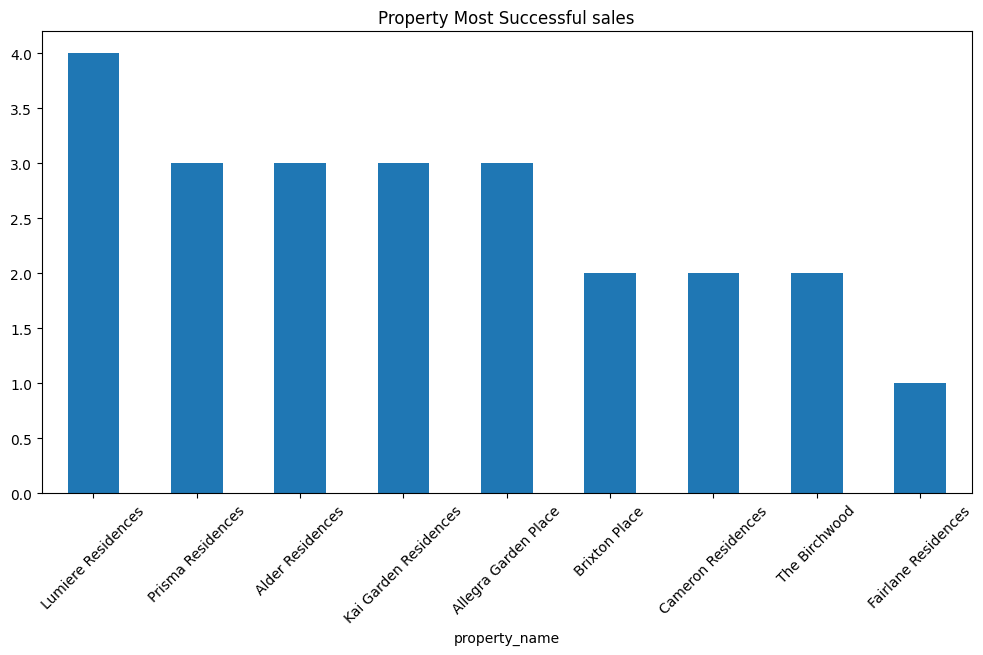

In [15]:
property_name_most.plot(kind='bar',figsize=(12,6))
plt.title('Property Most Successful sales')
plt.xticks(rotation=45)
plt.show()

In [16]:
df.head(1)

,transaction_id,property_name,unit_type,floor_area_sqm,unit_price,sale_date,agent_name,payment_terms,location,status,commission_rate,buyer_type
0,TXN001,Lumiere Residences,Studio,24.5,2450000,2025-01-15,Maria Santos,Bank Financing,Pasig City,Completed,0.03,First-Time Buyer


Problem 1: Top Selling Property by Revenue
Find the top 3 properties with the highest total revenue from completed sales only. Display the property name and total revenue.



In [17]:
completed_df = df[df['status'] == 'Completed']

top_selling_property_by_revenue = df.groupby('property_name').agg({'unit_price':'sum'}).reset_index().sort_values(by='unit_price',ascending=False)
top_selling_property_by_revenue 

,property_name,unit_price
6,Lumiere Residences,23050000
7,Prisma Residences,21050000
1,Allegra Garden Place,20350000
5,Kai Garden Residences,18205000
2,Brixton Place,18000000
4,Fairlane Residences,14750000
8,The Birchwood,12925000
3,Cameron Residences,11600000
0,Alder Residences,11400000


Problem 3: Agent Commission Summary
Calculate the total commission earned by each agent from completed sales. Commission = unit_price * commission_rate. Sort by highest commission.

In [18]:
df['price_per_sqm'] = df['unit_price'] / df['floor_area_sqm']
df['greater_than_100'] = df['price_per_sqm'] > 100000

filtered_expensive_units = df[df['greater_than_100'] == True]

filtered_expensive_units[['transaction_id','property_name','unit_type','price_per_sqm']]

,transaction_id,property_name,unit_type,price_per_sqm
6,TXN007,Kai Garden Residences,2BR,110000.0
7,TXN008,The Birchwood,Studio,110000.0
10,TXN011,Allegra Garden Place,3BR,110000.0
15,TXN016,Kai Garden Residences,3BR,110000.0
16,TXN017,The Birchwood,2BR,110000.0
19,TXN020,Allegra Garden Place,1BR,110000.0
24,TXN025,Kai Garden Residences,Studio,110000.0
25,TXN026,The Birchwood,1BR,110000.0
28,TXN029,Allegra Garden Place,2BR,110000.0


Problem 3: Agent Commission Summary
Calculate the total commission earned by each agent from completed sales. Commission = unit_price * commission_rate. Sort by highest commission.

In [19]:
completed_sale = df[df['status'] == 'Completed']

completed_sale['commission'] = completed_sale['unit_price'] * completed_sale['commission_rate']

highest_commision_of_agent = completed_sale['commission'].idxmax()

completed_sale.loc[
    completed_sale['commission'].idxmax(),
    ['agent_name', 'commission']
]



C:\Users\francis\AppData\Local\Temp\ipykernel_9168\4158434572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_sale['commission'] = completed_sale['unit_price'] * completed_sale['commission_rate']


agent_name    Anna Reyes
commission      495000.0
Name: 10, dtype: object

In [20]:

df = pd.read_csv('data.csv')

#convert data to date
df['sale_date'] = pd.to_datetime(df['sale_date'])

#create quarter
df['quarter'] = df['sale_date'].dt.to_period('Q')

df['quarter'] = df['quarter'].dt.quarter


completed = df[df['status'] == 'Completed']

total_number_of_sales = len(completed)
total_revenue = df['unit_price'].sum()

print(f'Total number of sales: {total_number_of_sales}')
print(f'Total revenue: {total_revenue}')

Total number of sales: 23
Total revenue: 151330000


buyer_type
First-Time Buyer    3,004,583.33
Investor            6,537,500.00
Name: unit_price, dtype: object


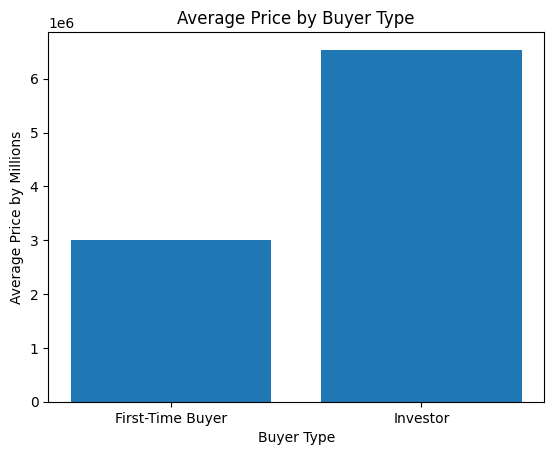

In [21]:
investor_vs_first_buyer = df[df['buyer_type'].isin(['Investor','First-Time Buyer'])]

average = investor_vs_first_buyer.groupby('buyer_type')['unit_price'].mean()

print(average.apply(lambda x: f'{x:,.2f}'))


plt.bar(average.index,average.values)
plt.xlabel('Buyer Type')
plt.ylabel('Average Price by Millions')
plt.title('Average Price by Buyer Type')
plt.show()

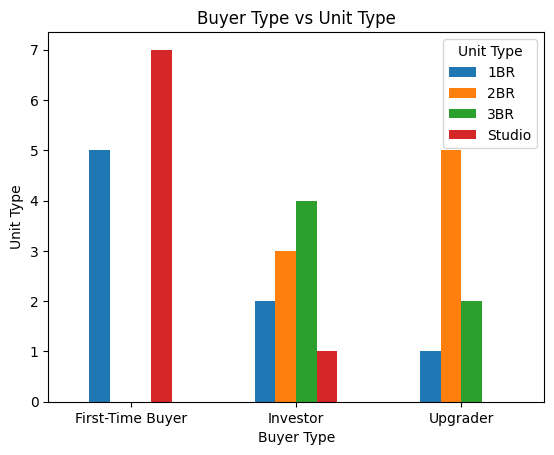

In [22]:
buyer_type_type = df.groupby('buyer_type')['unit_type'].value_counts()

buyer_type_type.unstack().plot(kind='bar')
plt.title('Buyer Type vs Unit Type')
plt.xlabel('Buyer Type')
plt.ylabel('Unit Type')
plt.legend(title='Unit Type')
plt.xticks(rotation=0)
plt.show()

In [23]:
total_transaction_per_buyer = df.groupby('buyer_type').agg({'transaction_id':'count'})

print(total_transaction_per_buyer)



                  transaction_id
buyer_type                      
First-Time Buyer              12
Investor                      10
Upgrader                       8


In [24]:
data_of_spot_cash = df[df['payment_terms'] == 'Spot Cash']['unit_price'].agg(
    ['mean','std','min','max','count']
)

print(data_of_spot_cash)



mean     5.625625e+06
std      2.703301e+06
min      2.300000e+06
max      9.900000e+06
count    8.000000e+00
Name: unit_price, dtype: float64


In [25]:
property_location_mapping = df.groupby(['location','property_name']).size()

property_location_mapping



location          property_name        
Mandaluyong City  Kai Garden Residences    3
Pasig City        Allegra Garden Place     3
                  Brixton Place            3
                  Fairlane Residences      3
                  Lumiere Residences       5
                  Prisma Residences        4
Quezon City       Cameron Residences       3
Taguig City       Alder Residences         3
                  The Birchwood            3
dtype: int64

In [26]:
df.dtypes

transaction_id             object
property_name              object
unit_type                  object
floor_area_sqm            float64
unit_price                  int64
sale_date          datetime64[ns]
agent_name                 object
payment_terms              object
location                   object
status                     object
commission_rate           float64
buyer_type                 object
quarter                     int64
dtype: object

<Axes: xlabel='agent_name'>

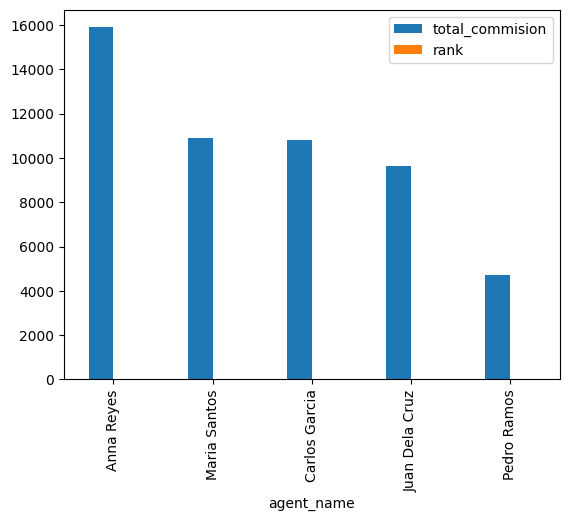

In [41]:
df['total_commision'] = df['commission_rate'] * df['unit_price'] / 100


agent_summary = df.groupby('agent_name')['total_commision'].sum().reset_index()

agent_summary['rank'] = agent_summary['total_commision'].rank(ascending=False,method='min')

condition = [
    agent_summary['rank'] == 1,
    agent_summary['rank'] <= 3,
    agent_summary['rank'] > 3
    
]

agent_summary['tier'] = np.select(condition, ['Gold','Silver','Bronze'], default='Bronze')
result = agent_summary.sort_values('rank')


result.plot(kind='bar',x='agent_name',)